# Energy Usage Analysis (for FY2015) on New York City Department of Citywide Administrative Services (NYC-DCAS) Govt. Buildings 

## Introduction

In New York city, the 'NYC Department of Citywide Administrative Services (DCAS)' manages Govt. work maintaining the city for well being of New Yorkers. 
It focuses to uphold the equity, effectiveness, and sustainability for the city people, helping city agengies with resources and support to suceed. 
To carry out the Govt. work, there are 55 (Govt.) buildings in different locations of five boroughs.

The DCAS's Division of Energy Management (DEM) looks after the energy management in these City buildings. DEM plays a critical role in supporting the agency partners' progress towards the City's major emissions reduction and energy objectives.

In this project, I am going to deep insight analysis on the energy usage (excluding fuel oil energy) of these buildings for FY2015.

**Few column names/terms in detail:**

**BBL:** In context of New York City energy usage, BBL (Borough-Block-Lot, also called Poperty ID number) is a unique 10-digit identifier for a specific piece of real estate, or tax lot. Building owners use the BBL number to track and report their property's energy usage to the city, a requirement under laws aimed at reducing greenhouse gas emissions. A single BBL can contain multiple individual buildings, such as a large cooperative or campus. A BBL is a 10-digit number broken down into three parts:<br>
The first digit represents the borough:<br>
1 = Manhattan<br>
2 = The Bronx<br>
3 = Brooklyn<br>
4 = Queens<br>
5 = Staten Island<br>
The next five digits indicate the tax block.<br>
The last four digits indicate the specific tax lot within that block. 

**BIN:** In energy usage contexts for New York City, BIN (Building Identification Number) is a unique 7-digit code assigned to every structure in the city. To submit a building's energy information, the BBL and the Building Identification Number (BIN) are entered into the EPA's(Environmental Protection Energy's) Portfolio Manager tool. This allows the city to track energy performance and ensure properties are meeting emissions standards.

**NTA:** It refers to Neighborhood Tabulation Areas. These are statistical geographic units used to report data at a sub-borough level.

## Import Python libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_NYC = pd.read_csv('DCAS_Managed_Buildings_Energy_Usage.csv')

In [3]:
pd.set_option('display.max_columns', None)
data_NYC.head(8)

,Borough Number,Building Name,Building Address,Borough,State,Postcode,Block,Lot,"FY15 Energy Usage (MMBTU) [Utility energy, excluding Fuel Oil",Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1,Manhattan Municipal Building,1 Centre St,Manhattan,New York,10007,121,1,92117,40.713001,-74.004181,1.0,1.0,29.0,1001394.0,1.001210e+09,Chinatown ...
1,5,Staten Island Borough Hall,10 Richmond Ter,Staten Island,New York,10301,7,1,11385,40.642197,-74.075201,1.0,49.0,3.0,5000063.0,5.000070e+09,West New Brighton-New Brighton-St. George ...
2,1,Manhattan Criminal Court,100 Centre Street,Manhattan,New York,10013,167,1,126511,40.716084,-74.001425,1.0,1.0,29.0,1079000.0,1.001670e+09,Chinatown ...
3,1,100 Gold St,100 Gold St,Manhattan,New York,10038,94,25,64582,40.710353,-74.004007,1.0,1.0,1501.0,1001289.0,1.000940e+09,Battery Park City-Lower Manhattan ...
4,5,Staten Island Family Court,100 Richmond Ter,Staten Island,New York,10301,9,22,1429,40.644935,-74.077230,1.0,49.0,7.0,5000090.0,5.000090e+09,West New Brighton-New Brighton-St. George ...
5,5,Staten Island Village Hall,111 Canal St,Staten Island,New York,10304,523,1,932,40.626584,-74.076758,1.0,49.0,21.0,5013729.0,5.005230e+09,Stapleton-Rosebank ...
6,1,Manhattan Civil Court,111 Centre St,Manhattan,New York,10013,169,10,27287,40.716317,-74.001277,1.0,1.0,31.0,1001833.0,1.001690e+09,SoHo-TriBeCa-Civic Center-Little Italy ...
7,1,115 Chrystie,115 Chrystie Street,Manhattan,New York,10002,423,22,1974,40.718647,-73.993586,3.0,1.0,18.0,1005645.0,1.004230e+09,Chinatown ...


In [4]:
data_NYC.BBL[0:5]

0    1.001210e+09
1    5.000070e+09
2    1.001670e+09
3    1.000940e+09
4    5.000090e+09
Name: BBL, dtype: float64

In [5]:
data_NYC.NTA[0:5]

0    Chinatown                                     ...
1    West New Brighton-New Brighton-St. George     ...
2    Chinatown                                     ...
3    Battery Park City-Lower Manhattan             ...
4    West New Brighton-New Brighton-St. George     ...
Name: NTA, dtype: object

In [6]:
data_NYC.columns

Index(['Borough Number', 'Building Name', 'Building Address', 'Borough',
       'State', 'Postcode', 'Block', 'Lot',
       'FY15 Energy Usage (MMBTU) [Utility energy, excluding Fuel Oil',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [7]:
data_NYC.shape

(55, 17)

**As there are 55 Govt. buildings in the city, therefore the dataset has 55 rows with their details and energy usage information.**

In [8]:
data_NYC.isnull().values.any()

np.True_

In [9]:
data_NYC['FY15 Energy Usage (MMBTU) [Utility energy, excluding Fuel Oil'].isnull().values.any()

np.False_

In [10]:
data_NYC.isnull().sum()

Borough Number                                                   0
Building Name                                                    0
Building Address                                                 0
Borough                                                          0
State                                                            0
Postcode                                                         0
Block                                                            0
Lot                                                              0
FY15 Energy Usage (MMBTU) [Utility energy, excluding Fuel Oil    0
Latitude                                                         6
Longitude                                                        6
Community Board                                                  6
Council District                                                 6
Census Tract                                                     6
BIN                                                           

In [11]:
# To check total number of null values in a dataframe
data_NYC.isnull().sum().sum()

np.int64(50)

In [12]:
data_NYC.nunique()

Borough Number                                                    5
Building Name                                                    55
Building Address                                                 55
Borough                                                           5
State                                                             1
Postcode                                                         23
Block                                                            48
Lot                                                              26
FY15 Energy Usage (MMBTU) [Utility energy, excluding Fuel Oil    55
Latitude                                                         49
Longitude                                                        49
Community Board                                                   9
Council District                                                 14
Census Tract                                                     26
BIN                                             

In [13]:
data_NYC.Borough.unique()

array(['Manhattan', 'Staten Island', 'Bronx', 'Brooklyn', 'Queens'],
      dtype=object)

## Data wrangling

In [14]:
# Drop duplicates
data_NYC.drop_duplicates(inplace = True)

In [15]:
data_NYC.shape

(55, 17)

**There are no duplicate entries in the dataset.**

In [16]:
# Rename the 'FY15 Energy Usage (MMBTU) [Utility energy, excluding Fuel Oil' to 'Energy usage'
data_NYC.rename(columns={'FY15 Energy Usage (MMBTU) [Utility energy, excluding Fuel Oil': 'Energy Usage'}, inplace=True)

## Exploratory Data Analysis

In [17]:
data_NYC['Energy Usage'].describe()

count        55.000000
mean      23958.636364
std       26364.288889
min         106.000000
25%        5774.000000
50%       15804.000000
75%       32787.500000
max      126511.000000
Name: Energy Usage, dtype: float64

### Total energy usage (excluding fuel oil) in all boroughs

In [18]:
print(f"Total energy usage for the year 2015 (excluding fuel oil): {data_NYC['Energy Usage'].sum()} MMBtu")

Total energy usage for the year 2015 (excluding fuel oil): 1317725 MMBtu


### Energy usage in each borough

In [19]:
Energy_usage_in_each_borough_NYC = data_NYC.groupby('Borough')['Energy Usage'].sum().sort_values(ascending = False).to_frame(name = "Total energy usage excluding fuel oil (MMBtu)").reset_index()
Energy_usage_in_each_borough_NYC

,Borough,Total energy usage excluding fuel oil (MMBtu)
0,Manhattan,630573
1,Brooklyn,258098
2,Queens,205890
3,Bronx,171186
4,Staten Island,51978


**Among all boroughs, in Manhattan there is maximum energy usage (excluding fuel oil) of 630573 MMBtu, followed by Brooklyn 258098 MMBtu) and Queens (205890 MMBtu).** 

### Num. of Govt. buildings in each borough

In [20]:
data_NYC.groupby('Borough')['Building Name'].count()

Borough
Bronx             7
Brooklyn         11
Manhattan        22
Queens            7
Staten Island     8
Name: Building Name, dtype: int64

**Manhattan has maximum (22) Govt. buildings, whereas Staten Island has least (8).**

## Plot the energy usage(excluding fuel oil) in every borough

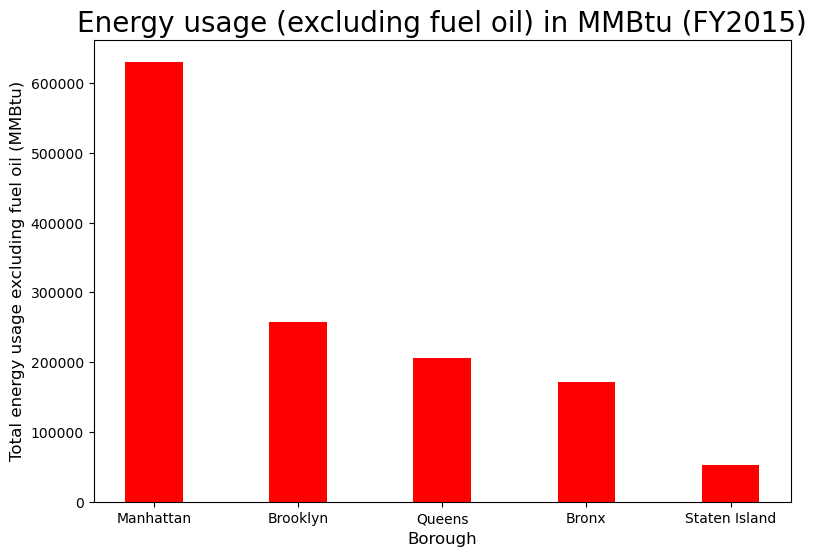

In [21]:
plt.figure(figsize = (9,6))
plt.bar(Energy_usage_in_each_borough_NYC['Borough'], Energy_usage_in_each_borough_NYC["Total energy usage excluding fuel oil (MMBtu)"], color = 'red', width = 0.4)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Total energy usage excluding fuel oil (MMBtu)', fontsize = 12)
plt.title("Energy usage (excluding fuel oil) in MMBtu (FY2015)", fontsize = 20)
plt.show()

### Import GeoPandas (for geographical visualization)    

In [22]:
import geopandas as gpd
from shapely.geometry import Point

In [23]:
# Import the shp file of New York city
map_NYC = gpd.read_file('geo_export_2c619fc6-39cf-4f49-84fa-a3fb7bb97faa.shp')

In [24]:
pd.set_option('display.max_columns', None)
map_NYC.head(10)

,geometry
0,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
4,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."


In [25]:
map_NYC.shape

(5, 1)

**There are only 5 rows in the dataset with details of five borough.**

In [26]:
map_NYC.geometry[0:5]

0    MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
1    MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...
2    MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...
3    MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...
4    MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...
Name: geometry, dtype: geometry

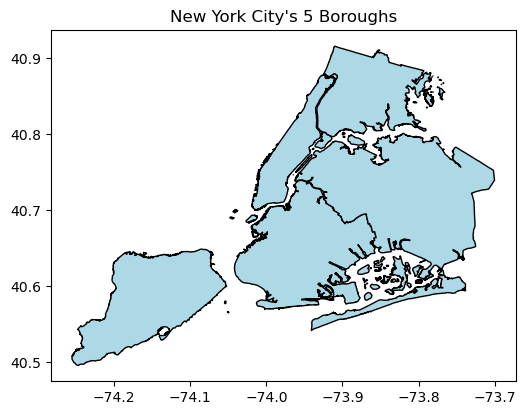

In [27]:
# Plot the five boroughs in New York city
fig, ax = plt.subplots(figsize = (6,6))
map_NYC.plot(ax = ax, color = 'lightblue', edgecolor = 'black') # Plot on the axes
plt.title("New York City's 5 Boroughs")
plt.show()

In [28]:
address_point = [Point(xy) for xy in zip(data_NYC['Longitude'], data_NYC['Latitude'])]
address_point[:3]

[<POINT (-74.004 40.713)>, <POINT (-74.075 40.642)>, <POINT (-74.001 40.716)>]

In [29]:
crs = {'init': 'epsg:4326'} # crs: Coordinate Reference System of the geometry object
Geo_data_NYC = gpd.GeoDataFrame(data_NYC,
                                crs = crs, geometry = address_point) 

C:\Users\dnaik\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [30]:
Geo_data_NYC.tail(5)

,Borough Number,Building Name,Building Address,Borough,State,Postcode,Block,Lot,Energy Usage,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
50,2,Bronx County Courthouse,851 Grand Concourse,Bronx,New York,10451,2468,1,15804,40.825999,-73.923131,4.0,8.0,63.0,2002869.0,2.024680e+09,West Concourse ...,POINT (-73.92313 40.826)
51,4,Queens Supreme Court,88-11 Sutphin Blvd,Queens,New York,11435,9691,1,23888,40.704623,-73.809151,12.0,24.0,238.0,4207071.0,4.096910e+09,Jamaica ...,POINT (-73.80915 40.70462)
52,4,Queens Civil Court,89-17 Sutphin Blvd,Queens,New York,11435,9680,1,16928,40.703617,-73.808685,12.0,24.0,240.0,4448759.0,4.096800e+09,Jamaica ...,POINT (-73.80868 40.70362)
53,5,Staten Island Civil Court,927 Castleton Ave,Staten Island,New York,10310,159,65,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
54,1,City Hall,City Hall Park,Manhattan,New York,10007,122,1,8035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY


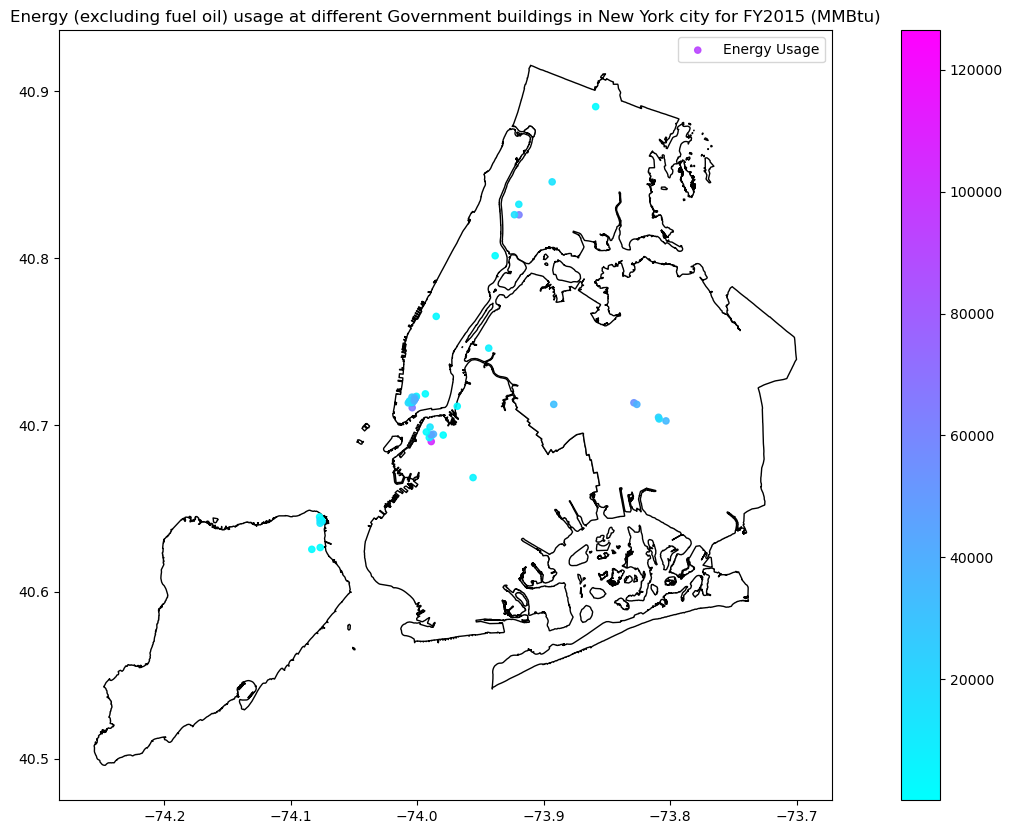

In [31]:
# Plot the Energy usage in different building
fig, ax = plt.subplots(figsize = (18, 10))
base = map_NYC.plot(ax = ax, color = 'white', edgecolor = 'black')
Geo_data_NYC.plot(ax = base, column = 'Energy Usage', label = 'Energy Usage', marker='o', markersize = 20, cmap = 'cool', alpha = 0.9, legend = True, )
plt.legend()
plt.title('Energy (excluding fuel oil) usage at different Government buildings in New York city for FY2015 (MMBtu)')
plt.savefig('Energy_Usage_Govt_Buildings_NYC_FY2015.png', bbox_inches ='tight')
plt.show()

As it is not distinguishable in the plot which building has maximum usage, let us carry out further analysis to obtain in detail.  

In [32]:
# Sort the 'Energy Usage' column 
sorted_energy_data_NYC = data_NYC.sort_values(by = 'Energy Usage', ascending = False).set_index(keys = 'Borough Number')

In [33]:
sorted_energy_data_NYC.columns

Index(['Building Name', 'Building Address', 'Borough', 'State', 'Postcode',
       'Block', 'Lot', 'Energy Usage', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [34]:
sorted_energy_data_NYC[['Building Name', 'Building Address', 'Borough', 'Energy Usage']].head(3)

,Building Name,Building Address,Borough,Energy Usage
Borough Number,,,,
1,Manhattan Criminal Court,100 Centre Street,Manhattan,126511
3,Brooklyn Criminal Court,120 Schermerhorn St,Brooklyn,104757
1,Manhattan Municipal Building,1 Centre St,Manhattan,92117


In [35]:
# Check this building has multiple BIN or not 
len([data_NYC['Building Name'] == 'Manhattan Criminal Court'])

1

**Dataset has only one entry of Manhattan Criminal court which  means it has one BIN (no multiple BINs).**

In [36]:
sorted_energy_data_NYC[['Building Name', 'Building Address', 'Borough', 'Energy Usage']].tail(3)

,Building Name,Building Address,Borough,Energy Usage
Borough Number,,,,
1,Harlem Courthouse,170 East 121st St,Manhattan,1265
5,Staten Island Village Hall,111 Canal St,Staten Island,932
3,Brooklyn Navy Yard,150 Navy Street,Brooklyn,106


# Summary: 

The analysis was carried out on the energy usage (excluding fuel oil) for FY2015 by all the 55 Govt. buildings in New York city operated under NYC-DCAS. <br>
It shows, the energy usage (excluding fuel oil) is different in different buildings with minimum of 106 MMBtu and maximum 126511 MMBtu.<br> 
The Manhattan Criminal Court had maximum energy usage (126511 MMBtu), followed by Brooklyn Criminal Court (104757 MMBtu) and Manhattan Municipal Building (92117 MMBtu).